# 계층적 군집 (1)

계층적 군집분석은 `데이터와 데이터`, `군집과 데이터`, `군집과 군집`간의 거리에 대한 유사도로 군집을 형성

**거리**에 대한 유사도로 군집을 형성

## 동작하는 방식

두 점 사이를 가까운 것끼리 합침. 이 과정을 반복하여 전체가 하나의 클러스터에 속할 떄까지 반복

> 이 과정에 대한 시각화 결과물이 댄드로그램 형태로 나타남

어떻게 두 점 사이의 거리를 결정할지에 대한 측정 방식이 필요함

> 유클리디안 거리 측정(직선거리), 맨하탄 거리 측정 방식(블록거리)

## 군집간의 거리를 구하는 방법

### 1. Min(Single Link)

군집과 군집의 거리를 구할 때 가장 최소거리인 것을 유사도로 측정하는 방식

### 2. Max(Complete LInk)

군집과 군집의 거리를 구할 때 가장 최대거리인 것을 유사도로 측정하는 방식

### 3. Average Link
군집과 군집의 거리를 구할 때 거리의 평균을 구해 유사도로 측정하는 방식

### 4. Centroids
군집과 군집의 거리를 구할 때 데이터의 중싱점 거리를 유사도로 측정하는 방식

### 5. Ward's method
두 개의 군집이 병합되었을 때 증가하는 변동성의 양으로 유사도를 측정하는 방식
- This is the only natural because this method is based on a sum of squares criterion which only performs well if an equal number of objects is drawn from each population and that it has difficulties with clusters of unequal diameters. Ward’s method often leads to misclassifications when the clusters are distinctly ellipsoidal rather than spherical, that is, when the variables are correlated within a cluster.

#### 변동성

두 군집의 중앙값과 두 군집에 있는 모든 데이터와의 거리의 합에서 군집간에 형성되는 거리를 뺀 값.



## 02. 패키지 가져오기

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [ ]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

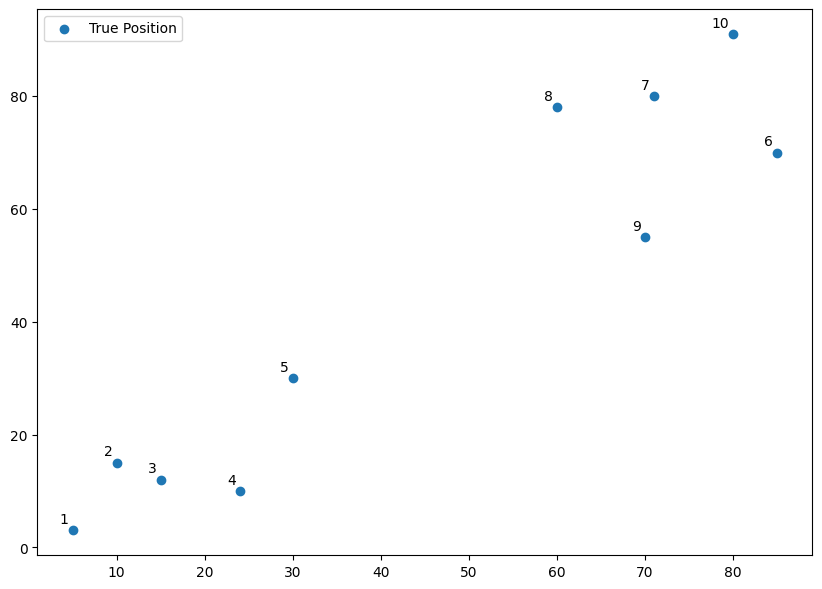

In [ ]:
labels = range(1, 11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label = "True Position")

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-3, 3),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
    plt.legend()
plt.show()

## 3. 계층 군집 수행
**method 파라미터**

군집간의 거리를 구하는 방법

`single`, `complete`, `average`, `weighted`, `centroid` 중 선택

### metric 파라미터

> scipy.sptail.distance.pdsit 클래스의 인스턴스

- `euclidean`: 점 사이의 직선거리 측정
- `cityblock`: 점 사이의 맨하탄 거리 측정(블록)
- `seuclidean`: 표준화 된 유클리디안
- `sqeuclidean` : 제곱된 유클리디안
- `cosine`: 코사인 거리 계산
- 콜백 함수 지정 가능함

In [ ]:
lnk = linkage(X, method='single', metric = 'euclidean')
lnk

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

### 군집 결과 시각화

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [14.375, 14.375, 64.375, 64.375]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [0.0, 9.219544457292887, 9.219544457292887, 5.830951894845301],
  [0.0, 13.0, 13.0, 9.219544457292887],
  [0.0, 20.8806130178211, 20.8806130178211, 13.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [0.0, 14.212670403551895, 14.212670403551895, 11.180339887498949],
  [0.0, 17.204650534085253, 17.204650534085253, 14.212670403551895],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [20.8806130178211,
   47.16990566028302,
   47.16990566028302,
   21.213203435596427]],
 'ivl': [5, 1, 4, 2, 3, 9, 6, 10, 7, 8],
 'leaves': [4, 0, 3, 1, 2, 8, 5, 9, 6, 7],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C0'],
 '

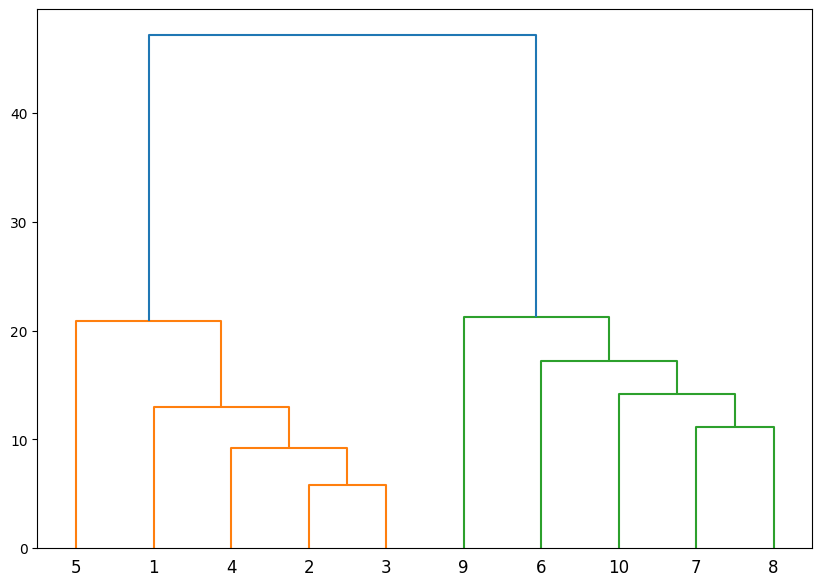

In [ ]:
labelList = range(1,11)
plt.figure(figsize= (10,7))
dendrogram(lnk,
           orientation='top', # 방향: top(기본값), bottom, left, right
           labels=labelList,
           # 각 노드 n에 대해 두 하위 링크가 표시되는 방식
           # False: 아무것도 안함(기본값)
           # 'ascending' : 클러스터에 원본 개체수가 가장 적은 하위 객체가 먼저 출력
           # 'descending': 클러스터에 원본 개체수가 가장 많은 하위 객체가 먼저 출력
           count_sort = 'ascending' ,
           # 각 노드 n에 대한 두 하위 링크가 표시되는 순서
           # False: 아무것도 안함(기본값)
           # 'ascending' : 직계 자손의 사이의 거리가 최소인 하위 항목이 먼저 표시됨
           # 'descending': 직계 자손의 사이의 거리가 최대인 하위 항목이 먼저 표시됨
           distance_sort= 'ascending',
           show_leaf_counts=True) #True: 맨 아래에 노드에 속한 개체 수 표시 (k<>1 경우만..))   

## 03. 병합군집 (sklearn)

### 1. 학습 모델 구현

In [29]:
ac = AgglomerativeClustering(
    # 찾아야 할 클러스터 수
    n_clusters= 2,
    # 클러스 간 거리를 측정하는 방법(euclidean, cityblock, manhattan, cosine)
    # `affinit` 파라미터는 sklearn 1.4.0 버전부터 사용 불가,
    metric = 'euclidean',
    # `ward`(기본값), 'complete', 'average', 'single',
    linkage= 'single',
    # 노드 간의 거리 계산값을 저장할지 여부 (시각화를 위해서는 필수 적용)
    compute_distances = True) 
clustering = ac.fit(X) 

### 2. 군집 결과 확인

In [30]:
labels = clustering.labels_
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### 3. 노드 간의 거리 확인
학습 모델 객체 생성 단계에서 반드시 ``compute_distances = True`가 설정되어야만 한다.

In [32]:
clustering.distances_

array([ 5.83095189,  9.21954446, 11.18033989, 13.        , 14.2126704 ,
       17.20465053, 20.88061302, 21.21320344, 47.16990566])

### 4. 군집 결과 시각화

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [20.0, 20.0, 35.0, 35.0],
  [5.0, 5.0, 27.5, 27.5],
  [16.25, 16.25, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [65.0, 65.0, 87.5, 87.5],
  [55.0, 55.0, 76.25, 76.25],
  [30.625, 30.625, 65.625, 65.625]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [5.830951894845301, 9.219544457292887, 9.219544457292887, 0.0],
  [0.0, 13.0, 13.0, 9.219544457292887],
  [13.0, 20.8806130178211, 20.8806130178211, 0.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [11.180339887498949, 14.212670403551895, 14.212670403551895, 0.0],
  [0.0, 17.204650534085253, 17.204650534085253, 14.212670403551895],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [20.8806130178211,
   47.16990566028302,
   47.16990566028302,
   21.213203435596427]],
 'ivl': ['0', '1', '2', '3', '4', '8', '5', '6', '7', '9'],
 'leaves': [0, 1, 2, 3, 4, 8, 5, 6, 7, 9],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C

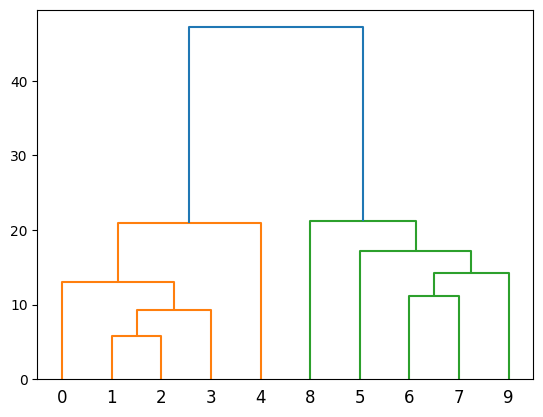

In [36]:
counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 # leaf node

        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
).astype(float)

# Plot the corresponding dndrogram
dendrogram(linkage_matrix)